In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp
from scipy.special import jv

In [3]:

sine800 = pd.read_csv('../Data/sine800hz.csv')
spiky400 = pd.read_csv('../Data/spiky400hz.csv')
square400hz = pd.read_csv('../Data/square400hz.csv')

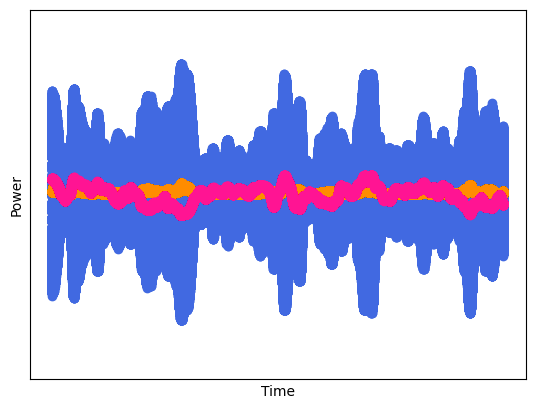

In [4]:
gelo = pd.read_csv('../Data/gelo.csv')
t = gelo['ch1_time(s)'] + 0.007
envelope = gelo['ch1_value(V)']
signalgen = gelo['ch2_value(V)']
result = gelo['ch4_value(V)']

plt.scatter(
    t,
    envelope,
    c='royalblue'
)

plt.scatter(
    t,
    result,
    c='darkorange'
)

plt.scatter(
    t,
    signalgen,
    c='deeppink'
)

plt.xticks([])
plt.yticks([])

plt.xlabel('Time')
plt.ylabel('Power')

plt.ylim(-1.5,1.5)
plt.savefig('../Figures/geloplot',bbox_inches = 'tight')
plt.show()

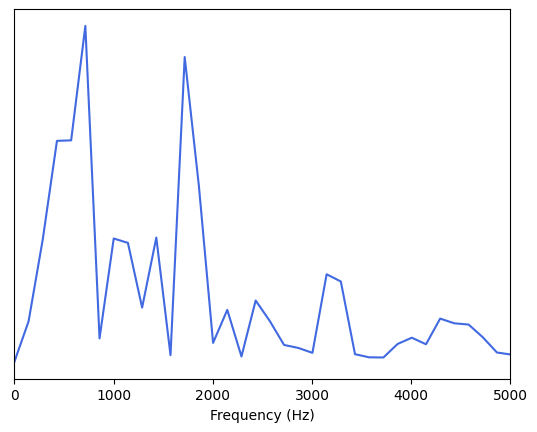

In [5]:
N = 2**10
gelo = pd.read_csv('../Data/gelo.csv').sample(N)
t = gelo['ch4_time(s)'] + 0.007
gelo = gelo.sort_values(by='ch4_time(s)',ascending=True)
result = gelo['ch4_value(V)'] - gelo['ch4_value(V)'].mean()
fs = N / (t.max() - t.min())

window = np.hamming(N)

fft = np.fft.rfft(result*window, N)
fftfreq = np.fft.rfftfreq(N, 1/fs)

plt.xlim(0,5000)

plt.xlabel('Frequency (Hz)')
plt.yticks([])

plt.plot(fftfreq,np.abs(fft**2),c='royalblue')
plt.savefig('../Figures/gelofourier',bbox_inches = 'tight')
plt.show()

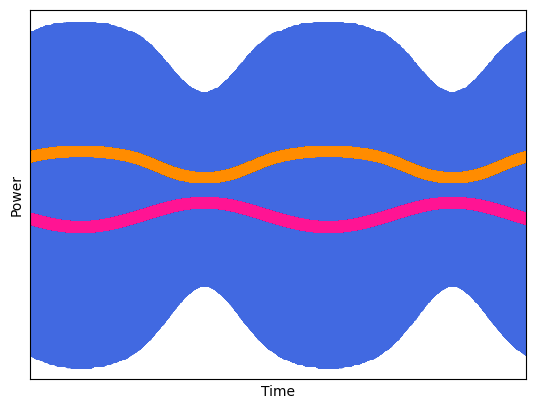

In [6]:
lowmod = pd.read_csv('../Data/lower modulation.csv')
t = lowmod['ch1_time(s)'] + 0.007
envelope = lowmod['ch1_value(V)']
signalgen = lowmod['ch2_value(V)']
result = lowmod['ch4_value(V)']

plt.scatter(
    t,
    envelope,
    c='royalblue'
)

plt.scatter(
    t,
    result,
    c='darkorange'
)

plt.scatter(
    t,
    signalgen,
    c='deeppink'
)

plt.xticks([])
plt.yticks([])

plt.xlabel('Time')
plt.ylabel('Power')

plt.xlim(0,0.005)
plt.savefig('../Figures/lowmodplot',bbox_inches = 'tight')
plt.show()

Peak frequency: 429.43 Hz


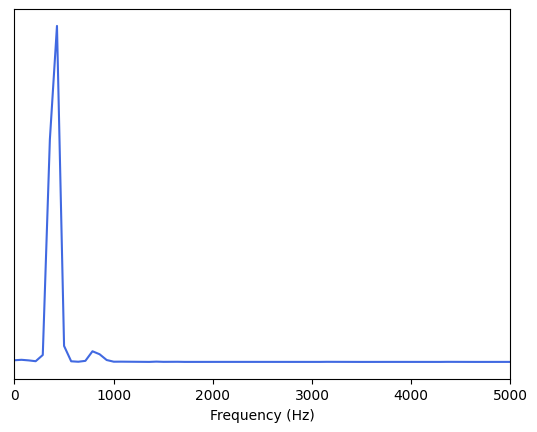

In [ ]:
N = 2**10
lowmod = pd.read_csv('../Data/lower modulation.csv').sample(N)
t = lowmod['ch4_time(s)'] + 0.007
lowmod = lowmod.sort_values(by='ch4_time(s)',ascending=True)
result = lowmod['ch4_value(V)'] - lowmod['ch4_value(V)'].mean()
fs = N / (t.max() - t.min())

window = np.hamming(N)

fftl = np.fft.rfft(result*window, N)
fftfreq = np.fft.rfftfreq(N, 1/fs)

plt.xlim(0,5000)

plt.xlabel('Frequency (Hz)')
plt.yticks([])

power = np.abs(fftl)**2

peak_index = np.argmax(power)

peak_freq = fftfreq[peak_index]

print(f'Peak frequency: {peak_freq:.2f} Hz')

plt.plot(fftfreq,np.abs(fftl**2),c='royalblue')
plt.savefig('../Figures/lowmodfourier',bbox_inches = 'tight')
plt.show()

In [ ]:
power = np.abs(fftl)**2
fftfreq = np.fft.rfftfreq(N, 1/fs)

peak_index = np.argmax(power)
peak_freq = fftfreq[peak_index]
peak_power = power[peak_index]
half_max = peak_power / 2

left_index = peak_index
while left_index > 0 and power[left_index] > half_max:
    left_index -= 1

right_index = peak_index
while right_index < len(power) - 1 and power[right_index] > half_max:
    right_index += 1

f_left = fftfreq[left_index]
f_right = fftfreq[right_index]

fwhm = f_right - f_left

print(f"Peak frequency: {peak_freq:.2f} Hz")
print(f"FWHM: {fwhm:.2f} Hz")

Peak frequency: 429.43 Hz
FWHM: 214.71 Hz


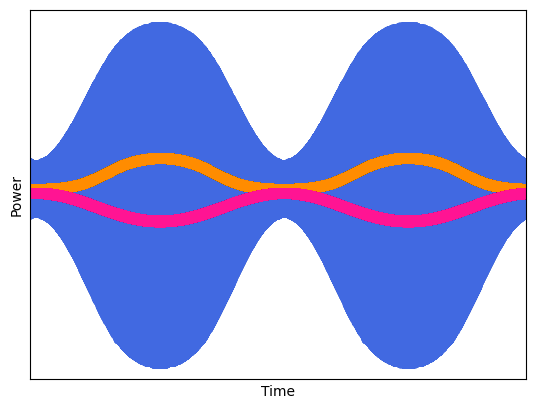

In [9]:
fullmod = pd.read_csv('../Data/full modulation.csv')
t = fullmod['ch1_time(s)'] + 0.007
envelope = fullmod['ch1_value(V)']
signalgen = fullmod['ch2_value(V)']
result = fullmod['ch4_value(V)']

plt.scatter(
    t,
    envelope,
    c='royalblue'
)

plt.scatter(
    t,
    result,
    c='darkorange'
)

plt.scatter(
    t,
    signalgen,
    c='deeppink'
)

plt.xticks([])
plt.yticks([])

plt.xlabel('Time')
plt.ylabel('Power')

plt.xlim(0,0.005)
plt.savefig('../Figures/fullmodplot',bbox_inches = 'tight')
plt.show()

Peak frequency: 358.01 Hz


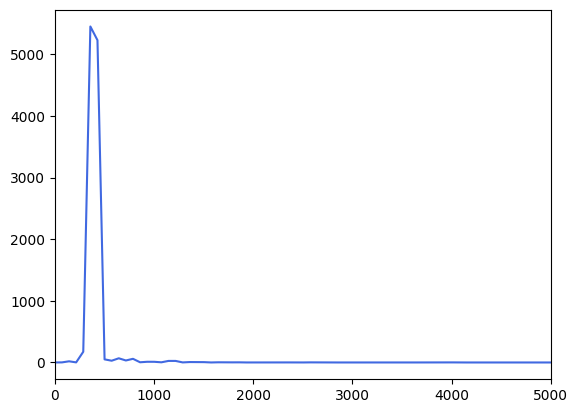

In [10]:
N = 2**10
fullmod = pd.read_csv('../Data/full modulation.csv').sample(N)
t = fullmod['ch4_time(s)'] + 0.007
fullmod = fullmod.sort_values(by='ch4_time(s)',ascending=True)
result = fullmod['ch4_value(V)'] - fullmod['ch4_value(V)'].mean()
fs = N / (t.max() - t.min())

window = np.hamming(N)

fftf = np.fft.rfft(result*window, N)
fftfreq = np.fft.rfftfreq(N, 1/fs)

plt.xlim(0,5000)

# Calculate power spectrum
power = np.abs(fftf)**2

# Find the index of the peak frequency
peak_index = np.argmax(power)

# Get the corresponding frequency
peak_freq = fftfreq[peak_index]

print(f'Peak frequency: {peak_freq:.2f} Hz')

plt.plot(fftfreq,np.abs(fftf**2),c='royalblue')
plt.savefig('../Figures/fullmodfourier',bbox_inches = 'tight')
plt.show()

In [11]:
import numpy as np

# Power spectrum
power = np.abs(fftf)**2
fftfreq = np.fft.rfftfreq(N, 1/fs)

# Peak index and value
peak_index = np.argmax(power)
peak_freq = fftfreq[peak_index]
peak_power = power[peak_index]
half_max = peak_power / 2

# === LEFT SIDE of peak ===
left_index = peak_index
while left_index > 0 and power[left_index] > half_max:
    left_index -= 1

# === RIGHT SIDE of peak ===
right_index = peak_index
while right_index < len(power) - 1 and power[right_index] > half_max:
    right_index += 1

# Frequency values at half max
f_left = fftfreq[left_index]
f_right = fftfreq[right_index]

# FWHM
fwhm = f_right - f_left

print(f"Peak frequency: {peak_freq:.2f} Hz")
print(f"FWHM: {fwhm:.2f} Hz")

Peak frequency: 358.01 Hz
FWHM: 214.81 Hz


Peak frequency: 429.97 Hz


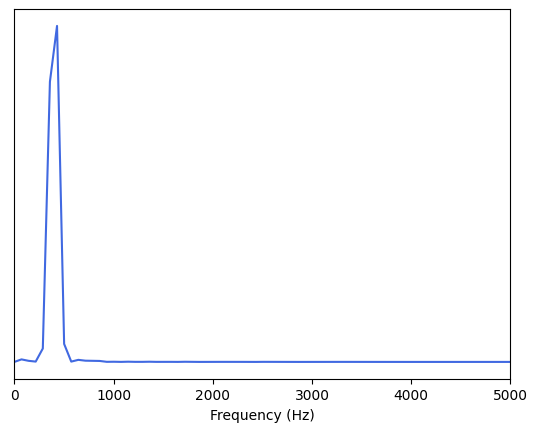

In [12]:
N = 2**10
fullmod = pd.read_csv('../Data/full modulation.csv').sample(N)
t = fullmod['ch2_time(s)'] + 0.007
fullmod = fullmod.sort_values(by='ch2_time(s)',ascending=True)
result = fullmod['ch2_value(V)'] - fullmod['ch2_value(V)'].mean()
fs = N / (t.max() - t.min())

window = np.hamming(N)

ffts = np.fft.rfft(result*window, N)
fftfreq = np.fft.rfftfreq(N, 1/fs)

plt.xlim(0,5000)

# Calculate power spectrum
power = np.abs(ffts)**2

# Find the index of the peak frequency
peak_index = np.argmax(power)

# Get the corresponding frequency
peak_freq = fftfreq[peak_index]

print(f'Peak frequency: {peak_freq:.2f} Hz')

plt.xlabel('Frequency (Hz)')
plt.yticks([])

plt.plot(fftfreq,np.abs(ffts**2),c='royalblue')
plt.savefig('../Figures/fullmodfouriersignal',bbox_inches = 'tight')
plt.show()

In [13]:
import numpy as np

# Power spectrum
power = np.abs(ffts)**2
fftfreq = np.fft.rfftfreq(N, 1/fs)

# Peak index and value
peak_index = np.argmax(power)
peak_freq = fftfreq[peak_index]
peak_power = power[peak_index]
half_max = peak_power / 2

# === LEFT SIDE of peak ===
left_index = peak_index
while left_index > 0 and power[left_index] > half_max:
    left_index -= 1

# === RIGHT SIDE of peak ===
right_index = peak_index
while right_index < len(power) - 1 and power[right_index] > half_max:
    right_index += 1

# Frequency values at half max
f_left = fftfreq[left_index]
f_right = fftfreq[right_index]

# FWHM
fwhm = f_right - f_left

print(f"Peak frequency: {peak_freq:.2f} Hz")
print(f"FWHM: {fwhm:.2f} Hz")

Peak frequency: 429.97 Hz
FWHM: 214.98 Hz


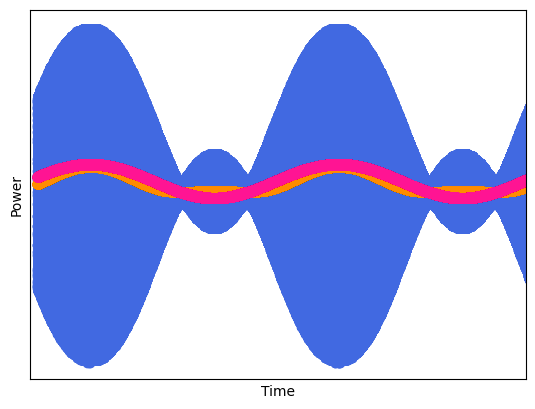

In [14]:
overmod = pd.read_csv('../Data/over modulation.csv')
t = overmod['ch1_time(s)'] + 0.007
envelope = overmod['ch1_value(V)']
signalgen = overmod['ch2_value(V)']
result = overmod['ch4_value(V)']

plt.scatter(
    t,
    envelope,
    c='royalblue'
)

plt.scatter(
    t,
    result,
    c='darkorange'
)

plt.scatter(
    t,
    signalgen,
    c='deeppink'
)

plt.xticks([])
plt.yticks([])

plt.xlabel('Time')
plt.ylabel('Power')

plt.xlim(0,0.005)
plt.savefig('../Figures/overmodplot',bbox_inches = 'tight')
plt.show()

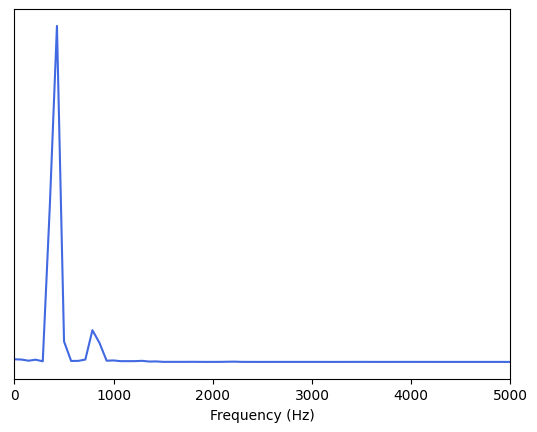

In [15]:
N = 2**10
overmod = pd.read_csv('../Data/over modulation.csv').sample(N)
t = overmod['ch4_time(s)'] + 0.007
overmod = overmod.sort_values(by='ch4_time(s)',ascending=True)
result = overmod['ch4_value(V)'] - overmod['ch4_value(V)'].mean()
fs = N / (t.max() - t.min())

window = np.hamming(N)

ffto = np.fft.rfft(result*window, N)
fftfreq = np.fft.rfftfreq(N, 1/fs)

plt.xlim(0,5000)
plt.xlabel('Frequency (Hz)')
plt.yticks([])

plt.plot(fftfreq,np.abs(ffto**2),c='royalblue')
plt.savefig('../Figures/overmodfourier',bbox_inches = 'tight')
plt.show()

In [16]:
# Step 1: Find primary peak
primary_index = np.argmax(power)
primary_freq = fftfreq[primary_index]
print(f'Primary peak frequency: {primary_freq:.2f} Hz')

# Step 2: Only look at frequencies above the first peak
# Create a mask for frequencies higher than the primary peak
mask = fftfreq > primary_freq + 200  # Add small buffer if needed

# Step 3: Apply mask
secondary_power = power[mask]
secondary_freqs = fftfreq[mask]

# Step 4: Find secondary peak in this range
secondary_index = np.argmax(secondary_power)
secondary_freq = secondary_freqs[secondary_index]

print(f'Secondary peak frequency: {secondary_freq:.2f} Hz')

Primary peak frequency: 429.14 Hz
Secondary peak frequency: 643.71 Hz


In [17]:
import numpy as np

# Power spectrum
power = np.abs(ffto)**2
fftfreq = np.fft.rfftfreq(N, 1/fs)

# Peak index and value
peak_index = np.argmax(power)
peak_freq = fftfreq[peak_index]
peak_power = power[peak_index]
half_max = peak_power / 2

# === LEFT SIDE of peak ===
left_index = peak_index
while left_index > 0 and power[left_index] > half_max:
    left_index -= 1

# === RIGHT SIDE of peak ===
right_index = peak_index
while right_index < len(power) - 1 and power[right_index] > half_max:
    right_index += 1

# Frequency values at half max
f_left = fftfreq[left_index]
f_right = fftfreq[right_index]

# FWHM
fwhm = f_right - f_left

print(f"Peak frequency: {peak_freq:.2f} Hz")
print(f"FWHM: {fwhm:.2f} Hz")

Peak frequency: 429.14 Hz
FWHM: 143.05 Hz


In [18]:
def line(x,m,c):
    return m * x + c
def cos(theta,I_0,theta0,offset):
    return I_0 * np.cos(np.radians((theta - theta0)))**2 + offset

In [19]:
# Uncertainties

# Velocity of sound 
vs_err = np.sqrt((0.05/1.8)**2 + (0.05/158)**2)

3861.158794759216


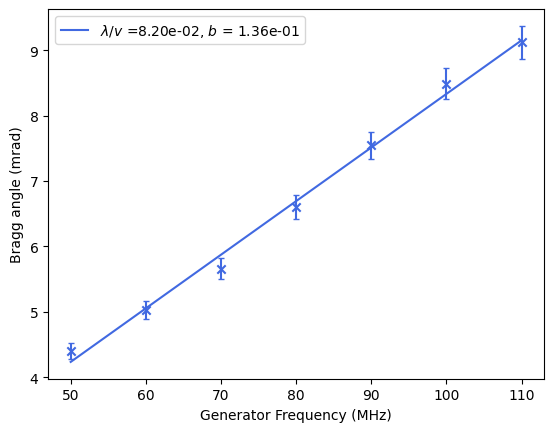

In [20]:
# Velocity of sound calculation

df = pd.read_csv('../Data/velocitysound.csv')
x = df['RF Frequency (MHz)'] 
y = df['Bragg Angle (mrad)'] *10**3

plt.scatter(
    x,
    y,
    marker='x',
    c='royalblue'
)

param,covariance = sp.curve_fit(line,x,y)
x_smooth = np.linspace(x.iloc[0],x.iloc[-1],1000)
y_smooth = line(x_smooth,*param)

plt.plot(
    x_smooth,
    y_smooth,
    label=rf'$\lambda/v$ ={param[0]:.2e}, $b$ = {param[1]:.2e}',
    color='royalblue'
)

plt.errorbar(
    x,
    y,
    yerr=vs_err*y,
    capsize=2,
    linestyle='',
    c='royalblue'
)

plt.xlabel('Generator Frequency (MHz)')
plt.ylabel('Bragg angle (mrad)')

print((633*10**-9)/(2*param[0]*10**-9))

plt.legend(loc='upper left')
plt.savefig('../Figures/velocity',bbox_inches = 'tight')
plt.show()

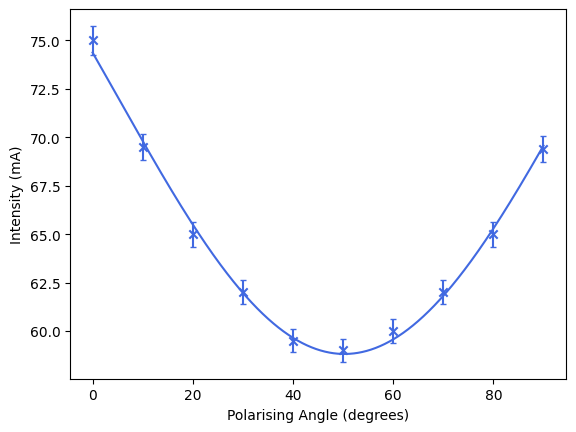

In [21]:
# Polarisation

df = pd.read_csv('../Data/polarisation.csv')
theta = df['Polariser Angle']
intensity = df['Intensity (mV mean)']

plt.scatter(
    theta,
    intensity,
    marker='x',
    c='royalblue'
)

param,covariance = sp.curve_fit(cos,theta,intensity)
x_smooth = np.linspace(theta.iloc[0],theta.iloc[-1],1000)
y_smooth = cos(x_smooth,*param)

plt.plot(
    x_smooth,
    y_smooth,
    label=rf'$\lambda/v$ ={param[0]:.4f}, $b$ = {param[1]:.4f}',
    color='royalblue'
)

plt.errorbar(
    theta,
    intensity,
    yerr=0.01*intensity,
    capsize=2,
    linestyle='',
    c='royalblue'
)

plt.ylabel('Intensity (mA)')
plt.xlabel('Polarising Angle (degrees)')
plt.savefig('../Figures/polarisation',bbox_inches = 'tight')
plt.show()

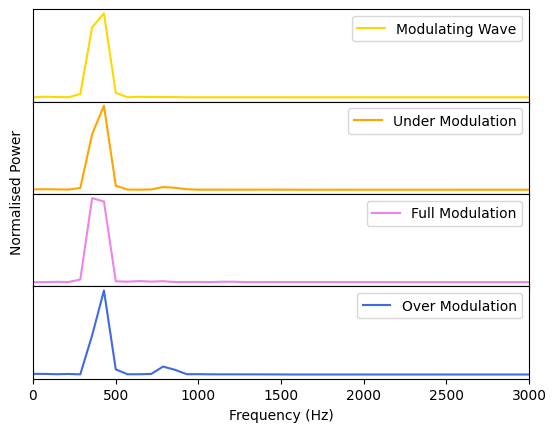

In [22]:
f, axes = plt.subplots(4,1,sharex=True)
plt.setp(axes,label='Frequency (Hz)', yticks= [])
l0 = axes[0].plot(fftfreq,np.abs(ffts**2),c='gold',label='Modulating Wave')
l1 = axes[1].plot(fftfreq,np.abs(fftl**2),c='orange',label='Under Modulation')
l2 = axes[2].plot(fftfreq,np.abs(fftf**2),c='violet', label='Full Modulation')
l3 = axes[3].plot(fftfreq,np.abs(ffto**2),c='royalblue',label='Over Modulation')
axes[0].set_xlim(0,3000)
axes[1].set_xlim(0,3000)
axes[2].set_xlim(0,3000)
axes[3].set_xlim(0,3000)
axes[-1].set_xlabel('Frequency (Hz)')
f.text(0.1, 0.5, 'Normalised Power', ha='center', va='center', rotation='vertical')
f.subplots_adjust(hspace=0)
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')
axes[3].legend(loc='upper right')
plt.savefig('../Figures/comparefft',bbox_inches = 'tight')

In [23]:
def bessel(deltaphi, theta_deg, k,offset,width=0.05,acoustic_wavelength=110*10**6):
    theta = np.radians(theta_deg)
    return k*jv(1, deltaphi *1/np.cos(theta) * np.sin(np.pi * width * np.tan(theta)/acoustic_wavelength)/(np.pi*width*np.tan(theta)/acoustic_wavelength)-offset)**2

def bessel_fit(theta_deg, deltaphi,k,offset):
    return bessel(theta_deg, deltaphi,k,offset)

[29.85549968  0.04544467 -2.30701699]
0     0.000529
1     0.000057
2     0.000081
3     0.000095
4     0.000073
5     0.000067
6     0.000068
7     0.000061
8     0.000070
9     0.000050
10    0.000058
11    0.000059
12    0.000301
13    0.000064
14    0.000066
15    0.000079
16    0.000097
17    0.000206
18    0.000084
19    0.000056
20    0.000042
21    0.000039
22    0.000040
23    0.000909
dtype: float64


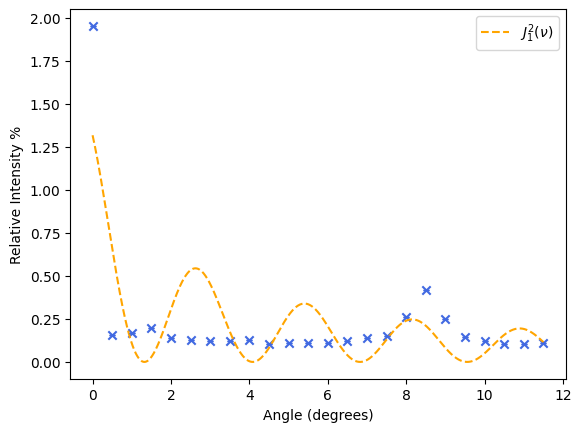

In [24]:
df = pd.read_csv('../Data/intensity.csv')

x = df['Angle (deg)']
y = df['V_0 (mV)']/(df['V_1 (V)']*1000)

err = np.sqrt(((df['dV_0(mu V)']*10**-9)/(df['V_0 (mV)']*10**-3))**2 + (df['dV_1 (mV)']*10**-3/df['V_1 (V)'])**2)

plt.scatter(
    x,
    y*100,
    c='royalblue',
    marker='x'
)

param,covariance = sp.curve_fit(bessel_fit,x,y,p0=[0.1,1,0])
print(param)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = bessel_fit(x_smooth,*param)

plt.plot(
    x_smooth,
    y_smooth*100,
    linestyle='--',
    c='orange',
    label=r'$J_1^2(\nu)$'
)

plt.errorbar(
    x,
    y*100,
    yerr=err*y*100,
    c='royalblue',
    capsize=2,
    linestyle=''
)
print(err*y*100)

plt.legend(loc='upper right')

plt.xlabel('Angle (degrees)')
plt.ylabel('Relative Intensity %')

plt.savefig('../Figures/intensity',bbox_inches = 'tight')
plt.show()

[29.85549968  0.04544467 -2.30701699]


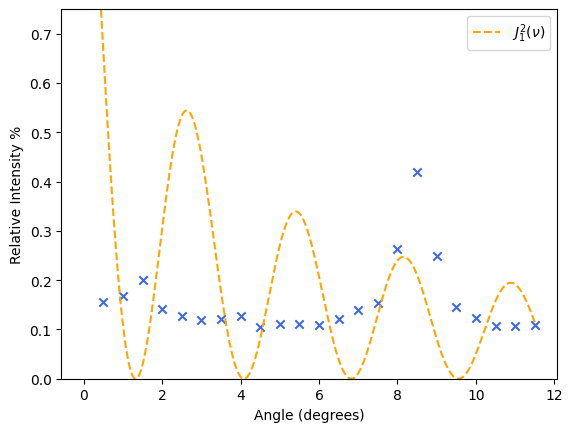

In [25]:
df = pd.read_csv('../Data/intensity.csv')

x = df['Angle (deg)']
y = df['V_0 (mV)']/(df['V_1 (V)']*1000)

plt.scatter(
    x,
    y*100,
    c='royalblue',
    marker='x'
)

param,covariance = sp.curve_fit(bessel_fit,x,y,p0=[0.1,1,0])
print(param)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = bessel_fit(x_smooth,*param)

plt.plot(
    x_smooth,
    y_smooth*100,
    linestyle='--',
    c='orange',
    label=r'$J_1^2(\nu)$'
)

plt.legend(loc='upper right')

plt.xlabel('Angle (degrees)')
plt.ylabel('Relative Intensity %')

plt.ylim(0,0.75)

plt.savefig('../Figures/intensity2',bbox_inches = 'tight')
plt.show()

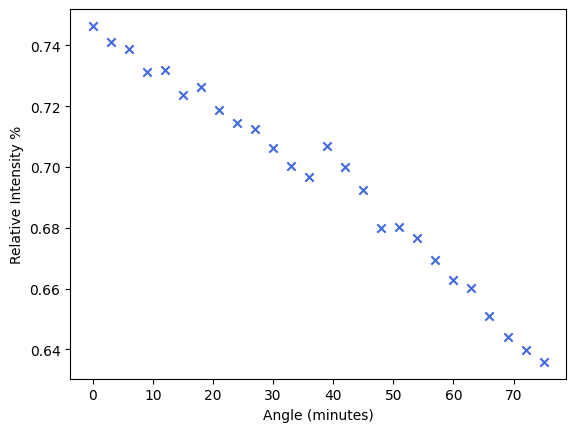

In [26]:
df = pd.read_csv('../Data/intensity2.csv')

x = df['Angle (mins)']
y = df['V (1st order) (mV)']/(df['V (main) (V)']*1000)

plt.scatter(
    x,
    y*100,
    c='royalblue',
    marker='x'
)

plt.xlabel('Angle (minutes)')
plt.ylabel('Relative Intensity %')

plt.savefig('../Figures/intensity3',bbox_inches = 'tight')
plt.show()

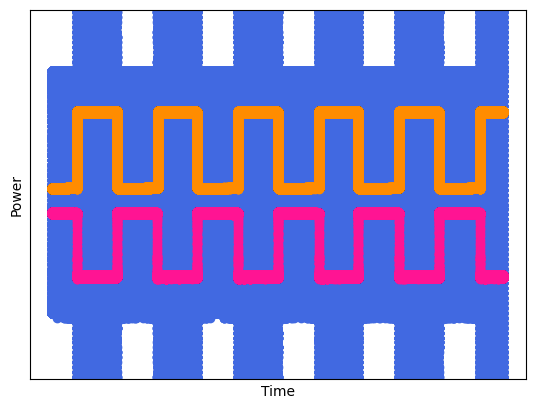

In [27]:
gelo = pd.read_csv('../Data/square400hz.csv')
t = gelo['ch1_time(s)'] + 0.007
envelope = gelo['ch1_value(V)']
signalgen = gelo['ch2_value(V)']
result = gelo['ch4_value(V)']

plt.scatter(
    t,
    envelope,
    c='royalblue'
)

plt.scatter(
    t,
    result,
    c='darkorange'
)

plt.scatter(
    t,
    signalgen,
    c='deeppink'
)

plt.xticks([])
plt.yticks([])

plt.xlabel('Time')
plt.ylabel('Power')

plt.ylim(-1.5,1.5)
plt.savefig('../Figures/squareplot',bbox_inches = 'tight')
plt.show()

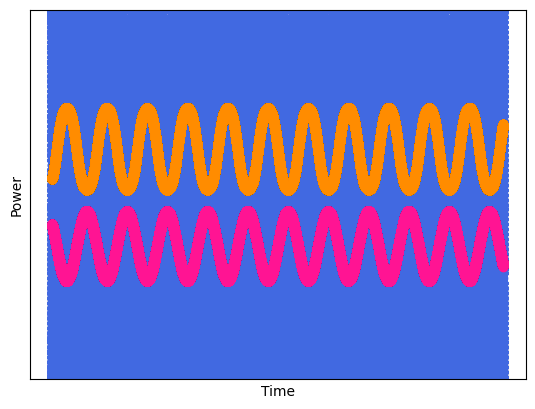

In [28]:
gelo = pd.read_csv('../Data/sine800hz.csv')
t = gelo['ch1_time(s)'] + 0.007
envelope = gelo['ch1_value(V)']
signalgen = gelo['ch2_value(V)']
result = gelo['ch4_value(V)']

plt.scatter(
    t,
    envelope,
    c='royalblue'
)

plt.scatter(
    t,
    result,
    c='darkorange'
)

plt.scatter(
    t,
    signalgen,
    c='deeppink'
)

plt.xticks([])
plt.yticks([])

plt.xlabel('Time')
plt.ylabel('Power')

plt.ylim(-1.5,1.5)
plt.savefig('../Figures/sine800plot',bbox_inches = 'tight')
plt.show()

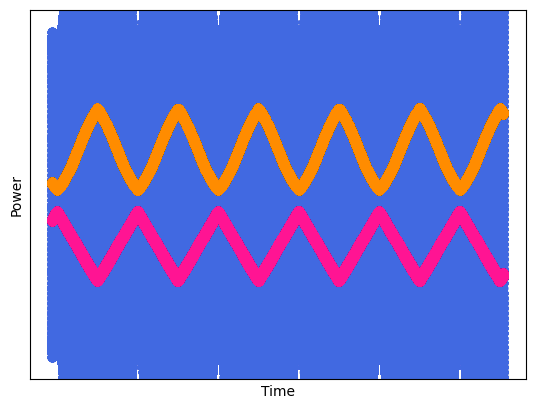

In [29]:
gelo = pd.read_csv('../Data/spiky400hz.csv')
t = gelo['ch1_time(s)'] + 0.007
envelope = gelo['ch1_value(V)']
signalgen = gelo['ch2_value(V)']
result = gelo['ch4_value(V)']

plt.scatter(
    t,
    envelope,
    c='royalblue'
)

plt.scatter(
    t,
    result,
    c='darkorange'
)

plt.scatter(
    t,
    signalgen,
    c='deeppink'
)

plt.xticks([])
plt.yticks([])

plt.xlabel('Time')
plt.ylabel('Power')

plt.ylim(-1.5,1.5)
plt.savefig('../Figures/spikyplot',bbox_inches = 'tight')
plt.show()

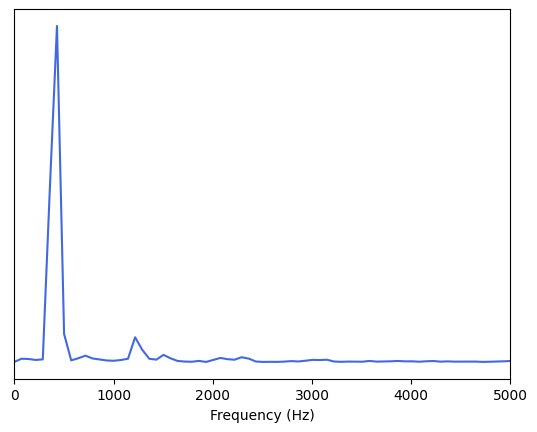

In [30]:
N = 2**10
overmod = pd.read_csv('../Data/square400hz.csv').sample(N)
t = overmod['ch4_time(s)'] + 0.007
overmod = overmod.sort_values(by='ch4_time(s)',ascending=True)
result = overmod['ch4_value(V)'] - overmod['ch4_value(V)'].mean()
fs = N / (t.max() - t.min())

window = np.hamming(N)

ffto = np.fft.rfft(result*window, N)
fftfreq = np.fft.rfftfreq(N, 1/fs)

plt.xlim(0,5000)
plt.xlabel('Frequency (Hz)')
plt.yticks([])

plt.plot(fftfreq,np.abs(ffto**2),c='royalblue')
plt.savefig('../Figures/squarefourier',bbox_inches = 'tight')
plt.show()

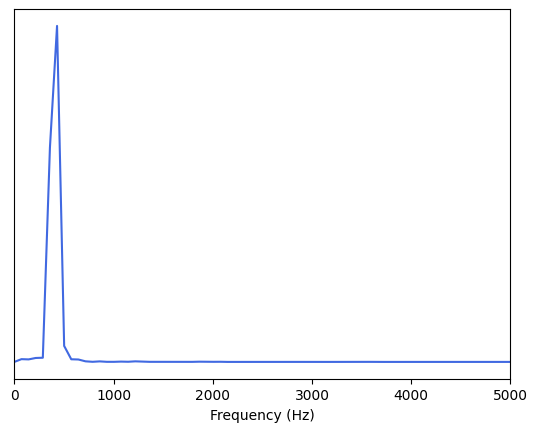

In [31]:
N = 2**10
overmod = pd.read_csv('../Data/spiky400hz.csv').sample(N)
t = overmod['ch4_time(s)'] + 0.007
overmod = overmod.sort_values(by='ch4_time(s)',ascending=True)
result = overmod['ch4_value(V)'] - overmod['ch4_value(V)'].mean()
fs = N / (t.max() - t.min())

window = np.hamming(N)

ffto = np.fft.rfft(result*window, N)
fftfreq = np.fft.rfftfreq(N, 1/fs)

plt.xlim(0,5000)
plt.xlabel('Frequency (Hz)')
plt.yticks([])

plt.plot(fftfreq,np.abs(ffto**2),c='royalblue')
plt.savefig('../Figures/spikyfourier',bbox_inches = 'tight')
plt.show()

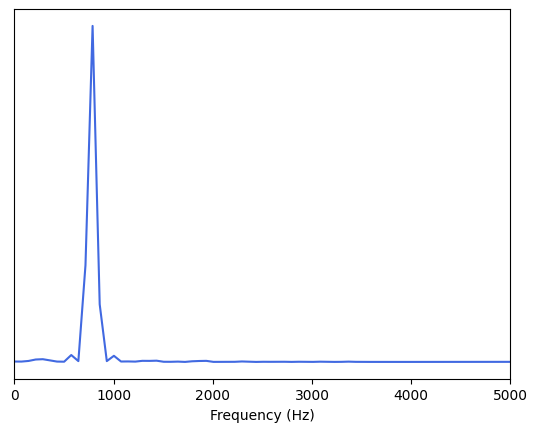

In [32]:
N = 2**10
overmod = pd.read_csv('../Data/sine800hz.csv').sample(N)
t = overmod['ch4_time(s)'] + 0.007
overmod = overmod.sort_values(by='ch4_time(s)',ascending=True)
result = overmod['ch4_value(V)'] - overmod['ch4_value(V)'].mean()
fs = N / (t.max() - t.min())

window = np.hamming(N)

ffto = np.fft.rfft(result*window, N)
fftfreq = np.fft.rfftfreq(N, 1/fs)

plt.xlim(0,5000)
plt.xlabel('Frequency (Hz)')
plt.yticks([])

plt.plot(fftfreq,np.abs(ffto**2),c='royalblue')
plt.savefig('../Figures/sine800hzfourier',bbox_inches = 'tight')
plt.show()